Sentence: "The queen who travelled across the vast kingdom governs wisely"
Tokens (10): ['the', 'queen', 'who', 'travelled', 'across', 'the', 'vast', 'kingdom', 'governs', 'wisely']

             TASK 1: BAG-OF-WORDS (BoW)              
A. Vocabulary Size: 9
B. BoW Vector (Frequency Counts):
[1. 1. 1. 1. 2. 1. 1. 1. 1.]

C. BoW Co-occurrence Matrix (Outer Product):
[[1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [2. 2. 2. 2. 4. 2. 2. 2. 2.]
 [1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 1. 1. 1.]]

Interpretation: This uniform matrix shows that BoW captures no structural relationship, treating all word pairs equally based on their presence in the document.



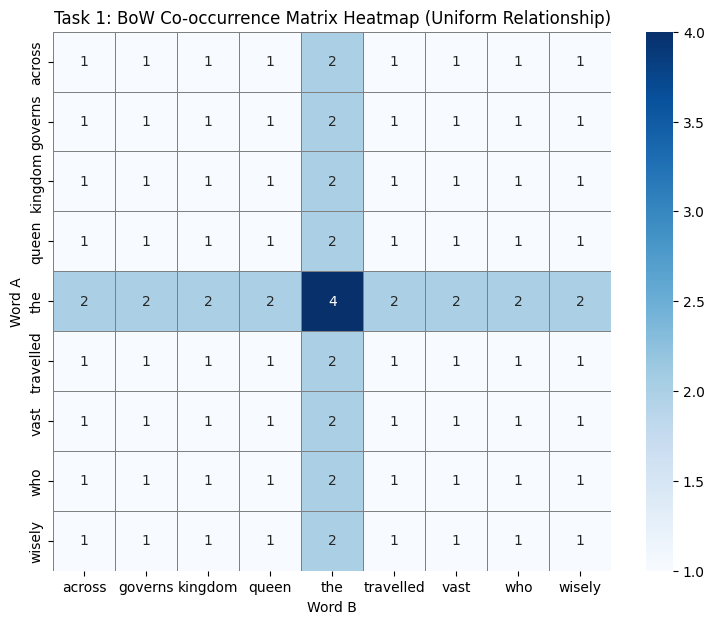

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- Input Data ---
SENTENCE = "The queen who travelled across the vast kingdom governs wisely"

# 1. Tokenize the sentence (simple split and cleanup)
def tokenize(sentence):
    # Remove punctuation (optional, but good practice for simple tokenization)
    clean_sentence = re.sub(r'[^\w\s]', '', sentence)
    return clean_sentence.lower().split()

tokens = tokenize(SENTENCE)
N = len(tokens)
print(f"Sentence: \"{SENTENCE}\"")
print(f"Tokens ({N}): {tokens}\n")

# 2. Build a vocabulary (since tokens are unique, vocabulary is the set of tokens)
vocab = sorted(list(set(tokens)))
vocab_size = len(vocab)
token_to_index = {token: i for i, token in enumerate(vocab)}

# --- Task 1: Bag-of-Words (BoW) and Co-occurrence Matrix ---
print("=====================================================")
print("             TASK 1: BAG-OF-WORDS (BoW)              ")
print("=====================================================")

# 3. Generate a BoW vector
# For frequency-based BoW, we count how many times each unique word appears in the document.
# Since all words in this short sentence are unique, the vector will be all 1s.
bow_vector = np.zeros(vocab_size)
for token in tokens:
    bow_vector[token_to_index[token]] += 1

print(f"A. Vocabulary Size: {vocab_size}")
print(f"B. BoW Vector (Frequency Counts):\n{bow_vector}\n")

# 4. Create a BoW co-occurrence matrix (Outer product of the BoW vector)
# This matrix shows how often words co-occur *in the document*, based purely on their overall frequency.
co_occurrence_matrix = np.outer(bow_vector, bow_vector)

print("C. BoW Co-occurrence Matrix (Outer Product):")
print(co_occurrence_matrix)
print("\nInterpretation: This uniform matrix shows that BoW captures no structural relationship, treating all word pairs equally based on their presence in the document.\n")

# 5. Plot the heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(co_occurrence_matrix, annot=True, fmt=".0f", cmap="Blues",
            xticklabels=vocab, yticklabels=vocab, linewidths=.5, linecolor='gray')
plt.title('Task 1: BoW Co-occurrence Matrix Heatmap (Uniform Relationship)')
plt.ylabel('Word A')
plt.xlabel('Word B')
plt.show()